<a href="https://colab.research.google.com/github/Ataerman/CNN_fruit360/blob/main/CNN_fruit360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download selected version
path = kagglehub.dataset_download("moltean/fruits/versions/11")

print("Path to dataset files:", path)

100%|██████████| 964M/964M [00:47<00:00, 21.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/moltean/fruits/versions/11


In [2]:
!cp -r /root/.cache/kagglehub/datasets/moltean/fruits/versions/11 /content/fruits_dataset


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import glob as glob
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img ,img_to_array

In [4]:
train_path='/content/fruits_dataset/fruits-360_dataset_100x100/fruits-360/Training'
test_path='/content/fruits_dataset/fruits-360_dataset_100x100/fruits-360/Test'

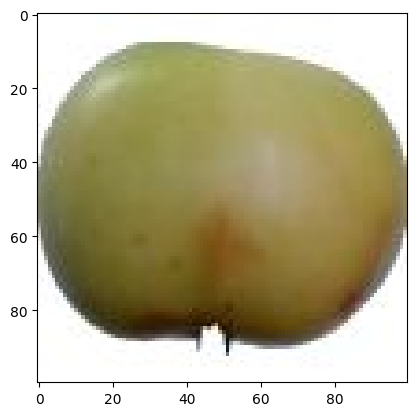

In [5]:
x=load_img('/content/fruits_dataset/fruits-360_dataset_100x100/fruits-360/Training/Apple 6/r0_100_100.jpg')
plt.imshow(x)
plt.show()

In [6]:
img=img_to_array(x)
img.shape

(100, 100, 3)

In [7]:
classname=glob.glob(train_path+'/*')
noc=len(classname)
print(noc)

141


In [8]:
import tensorflow
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten,Activation,Dropout,BatchNormalization,Add
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
model1=Sequential()

model1.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',input_shape=(img.shape)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.10))

model1.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.10))

model1.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.10))

model1.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.10))

model1.add(Flatten())
model1.add(Dense(512,activation='relu'))
model1.add(Dropout(0.10))
model1.add(Dense(512,activation='relu'))
model1.add(Dense(noc,activation='softmax'))

model1.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 141)            │        72,333 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,014,989 (22.95 MB)

 Trainable params: 6,014,989 (22.95 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
train_datagen=ImageDataGenerator(
    rescale=1./255.0,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)
test_datagen=ImageDataGenerator(
    rescale=1./255.0)

In [12]:
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(100,100),
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)
test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=img.shape[:2],
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.


In [13]:
batch_size=32
history1=model1.fit(
    train_generator,
    epochs=15,
    steps_per_epoch=1600//batch_size,
    validation_data=test_generator,
    validation_steps=800//batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 148ms/step - accuracy: 0.0094 - loss: 4.9486 - val_accuracy: 0.0175 - val_loss: 4.9406
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 265ms/step - accuracy: 0.0120 - loss: 4.9343 - val_accuracy: 0.0225 - val_loss: 4.8186
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.0227 - loss: 4.7578 - val_accuracy: 0.0338 - val_loss: 4.5454
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.0340 - loss: 4.5070 - val_accuracy: 0.0587 - val_loss: 4.3160
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.0540 - loss: 4.2057 - val_accuracy: 0.0850 - val_loss: 3.8840
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.0647 - loss: 3.8348 - val_accuracy: 0.0800 - val_loss: 3.5213
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.1140 - loss: 3.4772 - val_accuracy: 0.1488 - val_loss: 3.2922
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.1272 - loss: 3.2612 - val_accuracy: 0.1488

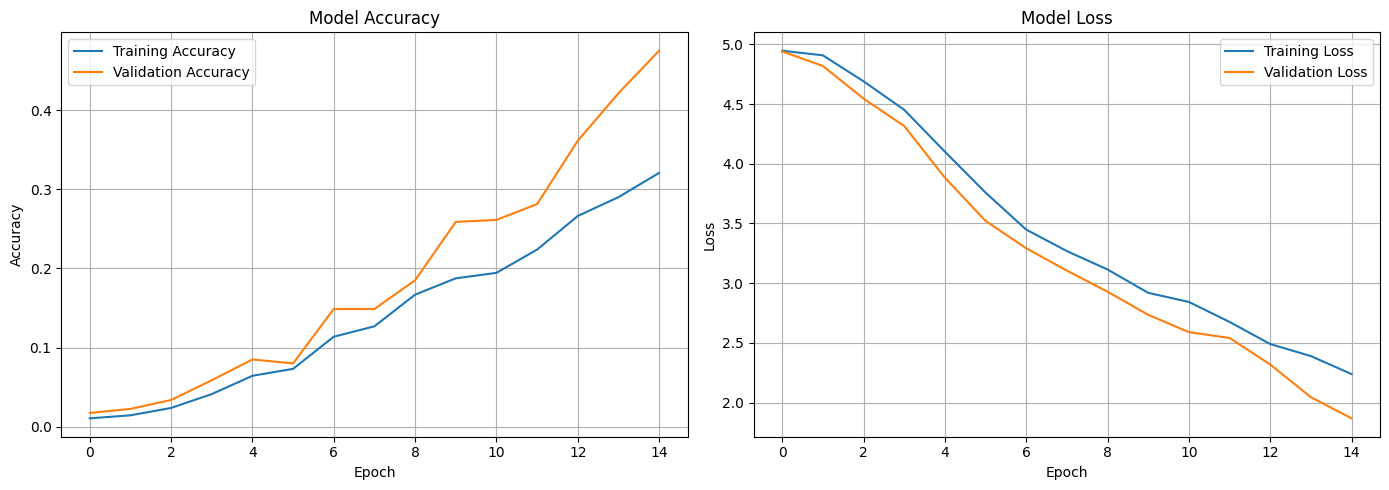

In [16]:
import matplotlib.pyplot as plt

# Training and validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
